In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
import warnings
from IPython import display

warnings.filterwarnings('ignore')

def fitting_quality_and_time(Anzahl_Daten, 
                             Anzahl_Parameter, 
                             factor = 0., 
                             marker = ['-', '--', '-.', ':'], 
                             color_p = [50, 100, 150, 200],
                             delay = True,
                             num = 0):
    
    warnings.filterwarnings('ignore')

    t_matrix = np.zeros((len(Anzahl_Parameter), len(Anzahl_Daten)))
    
    fig = plt.figure(figsize=(20,10))
    
    ax = plt.subplot(2,1,2, aspect=2)
    plt.title('Zusammenhang: Rechenzeit, Parameter- und Datenpunktanzahl')
    ax.set_xticks(range(len(Anzahl_Daten)))
    ax.set_yticks(range(len(Anzahl_Parameter)))
    ax.set_xticklabels(Anzahl_Daten)
    ax.set_yticklabels(Anzahl_Parameter)
    ax.set_xlabel('Anzahl Datenpunkte')
    ax.set_ylabel('Anzahl Parameter')



    for n in range(len(Anzahl_Daten)):
        
        
        # Messdaten-Generator
        x = np.linspace(0, 5, Anzahl_Daten[n])
        
        #warningmagnet
        x_kurz = np.linspace(0, 5, 10)
        y_kurz = np.sin(x_kurz)
        
        np.random.seed(num)
        y = np.sin(x) + factor * (np.random.random(len(x)) - 0.5)
        np.random.seed(num)
        
        # neue Stützpunkte
        xp = np.linspace(-2, 7, 100)
        
        # plot 1
        ax2 = plt.subplot(2,4,n+1)
        plt.title(str(Anzahl_Daten[n]) + ' Datenpunkte')
        plt.plot(x, y, 'k.')
        plt.plot(xp, np.sin(xp), '--k', alpha=0.2, label='sin(x)')
    
        plt.ylim(-3,2)
        plt.xlim(-2,7)
        plt.xlabel('x')
        plt.ylabel('y')
        
        
        # Pause
        if delay == True:
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1.0)
    
        
        # Zeitmesser
        temp = []
    
        
        for P in range(len(Anzahl_Parameter)):

            #warning magnet
            fit2 = np.poly1d(np.polyfit(x_kurz, y_kurz, 3, full=True)[0])
            fit2 = np.poly1d(np.polyfit(x_kurz, y_kurz, 30-1, full=True)[0])
            fit2 = np.poly1d(np.polyfit(x_kurz, y_kurz, 300-1, full=True)[0])

            # fitting & Zeit
            t_1 = time.time()
            
            np.random.seed(num)
            if True:
            #with warnings.catch_warnings():
            #    warnings.simplefilter('ignore', np.RankWarning)
                fit = np.poly1d(np.polyfit(x, y, Anzahl_Parameter[P]-1, full=True)[0])
            np.random.seed(num)
            
            t_2 = time.time() - t_1
            temp.append(t_2)
            t_matrix[P, n] = t_2
            
            # zu Plot Rechenzeit
            m = ax.imshow(t_matrix, vmin=1e-4, vmax=1e-2, 
                          norm=matplotlib.colors.LogNorm(), origin='lower', aspect='auto')
            
            if n == 0 and P == 0:
                cb = fig.colorbar(m, ax=ax, orientation='vertical', fraction=.2)
                cb.set_label('Rechenzeit (s)')

            # zu Plot Fit
            plt.plot(xp, fit(xp), '-', 
                     color= plt.cm.inferno_r(color_p[P]), 
                     label=str(Anzahl_Parameter[P]) + ' Parameter')
            
            handles,labels = ax2.get_legend_handles_labels()

            plt.legend(handles[::-1],labels[::-1], loc='lower center')
            
            # Pause
            if delay == True:
                display.clear_output(wait=True)
                display.display(plt.gcf())
                time.sleep(1.0)
            
            #fig.savefig(str(n) + str(P) + '.pdf')
                
        #print t_matrix
        #plt.loglog(temp, Anzahl_Parameter, '.k'+ marker[n], label=str(Anzahl_Daten[n]) + ' Datenpunkte')
        #
        #plt.ylabel('Parameter Anzahl')
        #plt.xlabel('Rechenzeit (s)')
        #plt.xlim(1e-5,1e0)
        #plt.legend(loc='upper left')

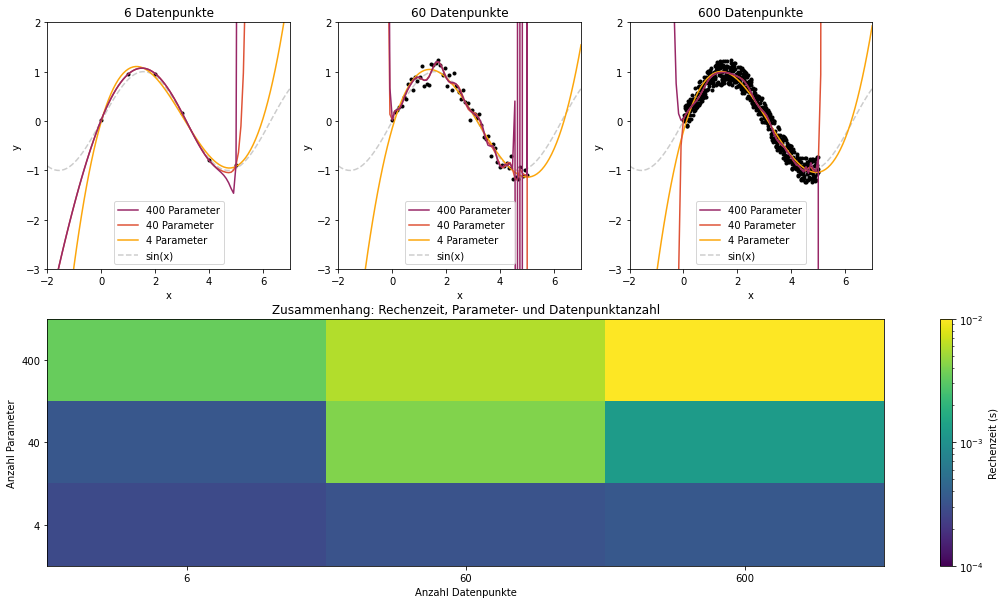

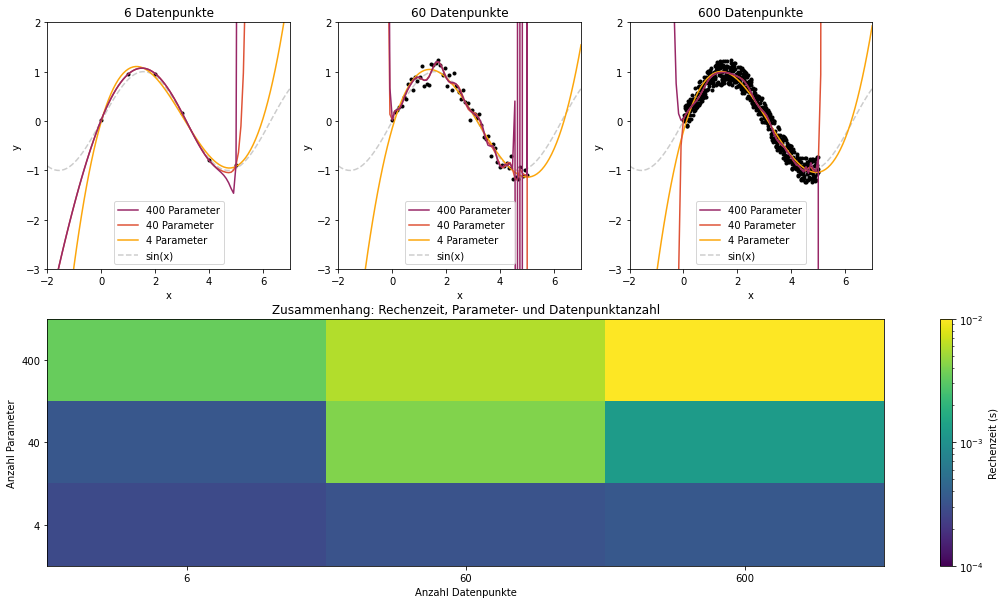

In [3]:
############################################p##############################################
# Rechenzeit in Abhängigkeit von der Anzahl der Parameter und der Anzahl der Messungen
########################################################################################
warnings.filterwarnings('ignore')
fitting_quality_and_time(Anzahl_Daten = [6, 60, 600], Anzahl_Parameter = [4, 40, 400], factor=0.5, num=0)